In [ ]:
import cv2

def image_variance(image_path, threshold=100):
    """Check the Laplacian variance of a given image."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Specify the path of the image you want to check
image_path = 'val_data/Image109.jpg'  # Adjust this path

variance = image_variance(image_path)
if variance is not None:
    print(f"Laplacian Variance of {image_path}: {variance}")
else:
    print("Failed to compute variance.")


Laplacian Variance of val_data/Image109.jpg: 190.35022809105783


The script starts by iterating through each image in the folder ('image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg').
For each image, it reads the image in grayscale and calculates the Laplacian variance using OpenCV's cv2.Laplacian() function. This variance represents the level of detail or sharpness in the image.
It accumulates the Laplacian variances of all images and counts the number of valid images processed (i.e., images successfully loaded and converted to grayscale).
Once it has processed all images, it calculates the average Laplacian variance by dividing the total variance by the number of valid images. This average variance becomes the dynamically adjusted threshold.
With the adjusted threshold, the script iterates through each image again, this time checking if the Laplacian variance of each image is lower than the threshold.
If the variance of an image is lower than the threshold, it considers the image to be blurred and adds it to the list of blurred images along with its variance.
Finally, the script prints the list of blurred images along with their Laplacian variances.

In [ ]:
import cv2
import os

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for filename in os.listdir(images_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            image_path = os.path.join(images_folder, filename)
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((filename, laplacian_var))
    return blurred_images

# Specify the folder containing your images
images_folder = 'val_data'  # Adjust this path

# Dynamically adjust the threshold based on the Laplacian variance of the images in the folder
threshold = 0  # Initialize threshold

# Calculate average Laplacian variance of images in the folder
total_variance = 0
num_images = 0
for filename in os.listdir(images_folder):
    if filename.lower().endswith(('.jpg')):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            total_variance += laplacian_var
            num_images += 1

# Adjust threshold based on average Laplacian variance
if num_images > 0:
    threshold = total_variance / num_images

# Find blurred images using the adjusted threshold
blurred_images = find_blurred_images(images_folder)

if blurred_images:
    print("Blurred Images:")
    for img, variance in blurred_images:
        print(f"Image: {img}, Laplacian Variance: {variance}")
else:
    print("No blurred images found.")


Blurred Images:
Image: Image10010.jpg, Laplacian Variance: 56.32521419473224
Image: Image10016.jpg, Laplacian Variance: 55.85933826887341
Image: Image10030.jpg, Laplacian Variance: 55.382564976745186
Image: Image10035.jpg, Laplacian Variance: 55.4289580362002
Image: Image10038.jpg, Laplacian Variance: 56.16882096556559
Image: Image10065.jpg, Laplacian Variance: 59.692949249225194
Image: Image10073.jpg, Laplacian Variance: 58.96927877994116
Image: Image10094.jpg, Laplacian Variance: 62.19770293134054
Image: Image10100.jpg, Laplacian Variance: 63.26512553643121
Image: Image10122.jpg, Laplacian Variance: 63.11891737822426
Image: Image10131.jpg, Laplacian Variance: 63.576181851535345
Image: Image10136.jpg, Laplacian Variance: 59.88926643863254
Image: Image10149.jpg, Laplacian Variance: 58.59882463374666
Image: Image10153.jpg, Laplacian Variance: 58.67901684738794
Image: Image10168.jpg, Laplacian Variance: 56.50287304050658
Image: Image1017.jpg, Laplacian Variance: 58.69457808159722
Image: 

In [ ]:
# Display count of blurred images
print(f"Number of blurred images: {len(blurred_images)}")

Number of blurred images: 5552


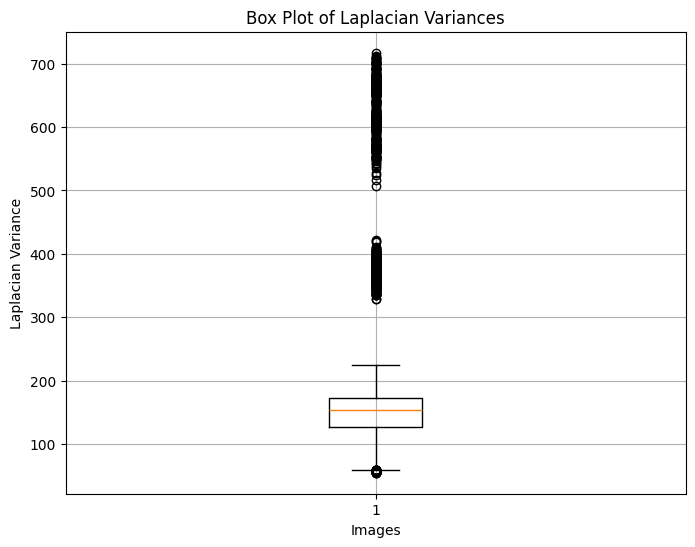

Blurred Images:
Image: Image10010.jpg, Laplacian Variance: 56.32521419473224
Image: Image10016.jpg, Laplacian Variance: 55.85933826887341
Image: Image10030.jpg, Laplacian Variance: 55.382564976745186
Image: Image10035.jpg, Laplacian Variance: 55.4289580362002
Image: Image10038.jpg, Laplacian Variance: 56.16882096556559
Image: Image10065.jpg, Laplacian Variance: 59.692949249225194
Image: Image10073.jpg, Laplacian Variance: 58.96927877994116
Image: Image10094.jpg, Laplacian Variance: 62.19770293134054
Image: Image10100.jpg, Laplacian Variance: 63.26512553643121
Image: Image10122.jpg, Laplacian Variance: 63.11891737822426
Image: Image10131.jpg, Laplacian Variance: 63.576181851535345
Image: Image10136.jpg, Laplacian Variance: 59.88926643863254
Image: Image10149.jpg, Laplacian Variance: 58.59882463374666
Image: Image10153.jpg, Laplacian Variance: 58.67901684738794
Image: Image10168.jpg, Laplacian Variance: 56.50287304050658
Image: Image1017.jpg, Laplacian Variance: 58.69457808159722
Image: 

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for filename in os.listdir(images_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            image_path = os.path.join(images_folder, filename)
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((filename, laplacian_var))
    return blurred_images

# Specify the folder containing your images
images_folder = 'val_data'  # Adjust this path

# Calculate Laplacian variances of images in the folder
laplacian_variances = []
for filename in os.listdir(images_folder):
    if filename.lower().endswith(('.jpg')):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            laplacian_variances.append(laplacian_var)

# Plot a box plot of Laplacian variances
plt.figure(figsize=(8, 6))
plt.boxplot(laplacian_variances)
plt.title('Box Plot of Laplacian Variances')
plt.xlabel('Images')
plt.ylabel('Laplacian Variance')
plt.grid(True)
plt.show()

# Calculate the lower quartile (Q1) of Laplacian variances
Q1 = np.percentile(laplacian_variances, 25)

# Find blurred images using the lower quartile as the threshold
blurred_images = find_blurred_images(images_folder, Q1)

if blurred_images:
    print("Blurred Images:")
    for img, variance in blurred_images:
        print(f"Image: {img}, Laplacian Variance: {variance}")
else:
    print("No blurred images found.")


In [ ]:
len(blurred_images)

1820

In [ ]:
train_csv_path = "train.csv"
test_csv_path = "test.csv"
train_images = "train_data"
test_images = "test_data"

In [ ]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 36.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
train_csv = pd.read_csv(train_csv_path)
train_csv.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image24482.jpg,Machine_Gun,845.333333,433.000000,999.166666,501.666667
1,Image68673.jpg,NoGun,0.000000,0.000000,0.000000,0.000000
2,Image11064.jpg,Machine_Gun,1479.749991,374.000001,1559.999992,620.000002
3,Image30314.jpg,Machine_Gun,1544.818177,400.545455,1727.727269,451.363638
4,Image51439.jpg,HandGun,478.333333,110.333333,515.000000,162.333333


In [ ]:
# Remove rows where the class is 'NoGun'
filtered_df = train_csv[train_csv['class'] != 'NoGun']
filtered_df.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image24482.jpg,Machine_Gun,845.333333,433.000000,999.166666,501.666667
2,Image11064.jpg,Machine_Gun,1479.749991,374.000001,1559.999992,620.000002
3,Image30314.jpg,Machine_Gun,1544.818177,400.545455,1727.727269,451.363638
4,Image51439.jpg,HandGun,478.333333,110.333333,515.000000,162.333333
5,Image51179.jpg,HandGun,346.200000,238.400000,362.400000,259.000000


In [ ]:
filtered_df.to_csv('Final_train_data.csv')

In [ ]:
import pandas as pd
train_csv = pd.read_csv('Final_train_data.csv')
train_csv.head()
train_csv.shape

(34082, 7)

In [ ]:
test_csv = pd.read_csv(test_csv_path)
test_csv.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image44643.jpg,HandGun,596.500010,353.916668,678.583344,416.666668
1,Image60308.jpg,HandGun,1689.666667,145.000000,1763.666667,235.000000
2,Image36521.jpg,HandGun,0.000000,383.000000,63.000000,449.000000
3,Image7424.jpg,NoGun,0.000000,0.000000,0.000000,0.000000
4,Image41696.jpg,HandGun,23.500000,365.500000,62.500000,404.000000


In [ ]:
# Remove rows where the class is 'NoGun'
filtered_df_test = test_csv[test_csv['class'] != 'NoGun']
filtered_df_test.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image44643.jpg,HandGun,596.500010,353.916668,678.583344,416.666668
1,Image60308.jpg,HandGun,1689.666667,145.000000,1763.666667,235.000000
2,Image36521.jpg,HandGun,0.000000,383.000000,63.000000,449.000000
4,Image41696.jpg,HandGun,23.500000,365.500000,62.500000,404.000000
5,Image54696.jpg,HandGun,291.000000,341.000000,310.000000,375.000000


In [ ]:
filtered_df_test.to_csv('Final_test_data.csv')

In [ ]:
import pandas as pd
test_csv = pd.read_csv('Final_test_data.csv')
test_csv.head()
test_csv.shape

(4260, 7)

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, image_names, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for image_name in image_names:
        image_path = os.path.join(images_folder, image_name)
        if os.path.exists(image_path):
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((image_name, laplacian_var))
    return blurred_images

def save_image(image_path, output_path):
    """Save an image to a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        return
    cv2.imwrite(output_path, image)
    print(f"Image saved to {output_path}")

# Replace the display_image function with save_image



# Specify the folder containing your images
images_folder = 'test_data'  # Adjust this path

# Extract relevant information from train_csv
image_names = test_csv['image_name'].tolist()
classes = test_csv['class'].tolist()  # Assuming there's a 'class' column in train_csv

# Calculate Laplacian variances of images in the folder
laplacian_variances = []
for filename in os.listdir(images_folder):
    if filename.lower().endswith(('.jpg')):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            laplacian_variances.append(laplacian_var)

# Calculate the lower quartile (Q1) of Laplacian variances
Q1 = np.percentile(laplacian_variances, 25)

# Find blurred images using the lower quartile as the threshold
blurred_images = find_blurred_images(images_folder, image_names, Q1)

# Save the details of blurred images and other relevant information to a CSV file
blurred_image_details = pd.DataFrame(blurred_images, columns=['image_name', 'laplacian_variance'])
blurred_image_details['class'] = [classes[image_names.index(img)] for img, _ in blurred_images]  # Assuming classes correspond to image_names
blurred_image_details.to_csv('blurred_images_details.csv', index=False)

# Print the number of blurred images
num_blurred_images = len(blurred_images)
print(f"Number of blurred images: {num_blurred_images}")

# Display one image below Q1 and one image above Q1
below_Q1_image = None
above_Q1_image = None
for img, variance in blurred_images:
    if variance < Q1 and below_Q1_image is None:
        below_Q1_image = img
    elif variance >= Q1 and above_Q1_image is None:
        above_Q1_image = img
    if below_Q1_image is not None and above_Q1_image is not None:
        break

# Display the below Q1 image
if below_Q1_image is not None:
    print("Below Q1 Image:", below_Q1_image)
    save_image(os.path.join(images_folder, below_Q1_image), 'below_Q1_image.jpg')
else:
    print("No image below Q1 found.")

# Display the above Q1 image
if above_Q1_image is not None:
    print("Above Q1 Image:", above_Q1_image)
    save_image(os.path.join(images_folder, above_Q1_image), 'above_Q1_image.jpg')
else:
    print("No image above Q1 found.")


Number of blurred images: 1103
Below Q1 Image: Image41696.jpg
Image saved to below_Q1_image.jpg
No image above Q1 found.


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, image_names, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for image_name in image_names:
        image_path = os.path.join(images_folder, image_name)
        if os.path.exists(image_path):
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((image_name, laplacian_var))
    return blurred_images

def save_image(image_path, output_path):
    """Save an image to a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        return
    cv2.imwrite(output_path, image)
    print(f"Image saved to {output_path}")

# Replace the display_image function with save_image



# Specify the folder containing your images
images_folder = 'train_data'  # Adjust this path

# Extract relevant information from train_csv
image_names = train_csv['image_name'].tolist()
classes = train_csv['class'].tolist()  # Assuming there's a 'class' column in train_csv

# Calculate Laplacian variances of images in the folder
laplacian_variances = []
for filename in os.listdir(images_folder):
    if filename.lower().endswith(('.jpg')):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            laplacian_variances.append(laplacian_var)

# Calculate the lower quartile (Q1) of Laplacian variances
Q1 = np.percentile(laplacian_variances, 25)

# Find blurred images using the lower quartile as the threshold
blurred_images = find_blurred_images(images_folder, image_names, Q1)

# Save the details of blurred images and other relevant information to a CSV file
blurred_image_details = pd.DataFrame(blurred_images, columns=['image_name', 'laplacian_variance'])
blurred_image_details['class'] = [classes[image_names.index(img)] for img, _ in blurred_images]  # Assuming classes correspond to image_names
blurred_image_details.to_csv('blurred_images_details.csv', index=False)

# Print the number of blurred images
num_blurred_images = len(blurred_images)
print(f"Number of blurred images: {num_blurred_images}")

# Display one image below Q1 and one image above Q1
below_Q1_image = None
above_Q1_image = None
for img, variance in blurred_images:
    if variance < Q1 and below_Q1_image is None:
        below_Q1_image = img
    elif variance >= Q1 and above_Q1_image is None:
        above_Q1_image = img
    if below_Q1_image is not None and above_Q1_image is not None:
        break

# Display the below Q1 image
if below_Q1_image is not None:
    print("Below Q1 Image:", below_Q1_image)
    save_image(os.path.join(images_folder, below_Q1_image), 'below_Q1_image.jpg')
else:
    print("No image below Q1 found.")

# Display the above Q1 image
if above_Q1_image is not None:
    print("Above Q1 Image:", above_Q1_image)
    save_image(os.path.join(images_folder, above_Q1_image), 'above_Q1_image.jpg')
else:
    print("No image above Q1 found.")


KeyboardInterrupt: 

In [ ]:
pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 51.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, image_names, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for image_name in image_names:
        image_path = os.path.join(images_folder, image_name)
        if os.path.exists(image_path):
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((image_name, laplacian_var))
    return blurred_images

def save_image(image_path, output_path):
    """Save an image to a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        return
    cv2.imwrite(output_path, image)
    print(f"Image saved to {output_path}")

# Specify the folder containing your images
images_folder = 'train_data'  # Adjust this path

# Extract relevant information from train_csv

image_names = train_csv['image_name'].tolist()
classes = train_csv['class'].tolist()  # Assuming there's a 'class' column in train_csv

# Calculate Laplacian variances of images in the folder
laplacian_variances = []
for filename in os.listdir(images_folder):
    if filename.lower().endswith('.jpg'):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            laplacian_variances.append((filename, laplacian_var))

# Sort the list of Laplacian variances by the variance values
laplacian_variances.sort(key=lambda x: x[1])

# Select the top 100 images with the lowest Laplacian variances
top_100_images = laplacian_variances[:100]

# Save the details of top 100 images and other relevant information to a CSV file
top_100_image_details = pd.DataFrame(top_100_images, columns=['image_name', 'laplacian_variance'])
top_100_image_details['class'] = [classes[image_names.index(img)] for img, _ in top_100_images]  # Assuming classes correspond to image_names
top_100_image_details.to_csv('top_100_images_details.csv', index=False)

# Print the number of top 100 images
num_top_100_images = len(top_100_images)
print(f"Number of top 100 images: {num_top_100_images}")

# Display one image from the top 100
if num_top_100_images > 0:
    top_image_name, _ = top_100_images[0]
    print("Top Image:", top_image_name)
    save_image(os.path.join(images_folder, top_image_name), 'top_image.jpg')
else:
    print("No top 100 images found.")


Number of top 100 images: 100
Top Image: Image4614.jpg
Image saved to top_image.jpg


In [ ]:
len(laplacian_variances)

56555

In [ ]:
# Sort the list of Laplacian variances by the variance values
laplacian_variances.sort(key=lambda x: x[1])

# Select the top 100 images with the lowest Laplacian variances
top_100_images = laplacian_variances[:100]

# Save the details of top 100 images and other relevant information to a CSV file
top_100_image_details = pd.DataFrame(top_100_images, columns=['image_name', 'laplacian_variance'])
top_100_image_details['class'] = [classes[image_names.index(img)] for img, _ in top_100_images]  # Assuming classes correspond to image_names
top_100_image_details.to_csv('top_100_images_details.csv', index=False)

# Print the number of top 100 images
num_top_100_images = len(top_100_images)
print(f"Number of top 100 images: {num_top_100_images}")

# Display one image from the top 100
if num_top_100_images > 0:
    top_image_name, _ = top_100_images[0]
    print("Top Image:", top_image_name)
    save_image(os.path.join(images_folder, top_image_name), 'top_image.jpg')
else:
    print("No top 100 images found.")


ValueError: 'Image4614.jpg' is not in list

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, image_names, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for image_name in image_names:
        image_path = os.path.join(images_folder, image_name)
        if os.path.exists(image_path):
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((image_name, laplacian_var))
    return blurred_images

def save_image(image_path, output_path):
    """Save an image to a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        return
    cv2.imwrite(output_path, image)
    print(f"Image saved to {output_path}")



# Specify the folder containing your images
images_folder = 'train_data'  # Adjust this path

# Extract relevant information from train_csv
image_names = train_csv['image_name'].tolist()
classes = train_csv['class'].tolist()  # Assuming there's a 'class' column in train_csv

# Calculate Laplacian variances of images in the folder
laplacian_variances = []
for filename in os.listdir(images_folder):
    if filename.lower().endswith('.jpg'):
        image_path = os.path.join(images_folder, filename)
        gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray is not None:
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            laplacian_variances.append((filename, laplacian_var))

# Sort the list of Laplacian variances by the variance values
laplacian_variances.sort(key=lambda x: x[1])

# Select the top 100 images with the lowest Laplacian variances
top_100_images = laplacian_variances[:100]

# Merge top 100 image details with train_csv
top_100_image_details = pd.DataFrame(top_100_images, columns=['image_name', 'laplacian_variance'])
merged_details = pd.merge(top_100_image_details, train_csv, on='image_name')

# Save the merged details to a CSV file
merged_details.to_csv('top_100_images_with_details.csv', index=False)

# Print the number of top 100 images
num_top_100_images = len(top_100_images)
print(f"Number of top 100 images: {num_top_100_images}")

# Display one image from the top 100
if num_top_100_images > 0:
    top_image_name, _ = top_100_images[0]
    print("Top Image:", top_image_name)
    save_image(os.path.join(images_folder, top_image_name), 'top_image.jpg')
else:
    print("No top 100 images found.")


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

def is_blurred(image_path, threshold):
    """Determine if the image at image_path is blurred, based on the Laplacian variance."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Failed to load image at {image_path}")
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

def find_blurred_images(images_folder, image_names, threshold):
    """Find blurred images in the specified folder."""
    blurred_images = []
    for image_name in image_names:
        image_path = os.path.join(images_folder, image_name)
        if os.path.exists(image_path):
            is_blurred_result, laplacian_var = is_blurred(image_path, threshold)
            if is_blurred_result:
                blurred_images.append((image_name, laplacian_var))
    return blurred_images

def save_image(image_path, output_path):
    """Save an image to a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        return
    cv2.imwrite(output_path, image)
    print(f"Image saved to {output_path}")

# Specify the folder containing your images
images_folder = 'train_data'  # Adjust this path


image_names = train_csv['image_name'].tolist()
classes = train_csv['class'].tolist()  # Assuming there's a 'class' column in train_csv
xmin = train_csv['xmin'].tolist()  # Assuming there's a 'xmin' column in train_csv
ymin = train_csv['ymin'].tolist()  # Assuming there's a 'ymin' column in train_csv
xmax = train_csv['xmax'].tolist()  # Assuming there's a 'xmax' column in train_csv
ymax = train_csv['ymax'].tolist()  # Assuming there's a 'ymax' column in train_csv

# Filter images in train_data folder based on image names in train_csv
valid_image_names = [filename for filename in os.listdir(images_folder) if filename in image_names]

# Calculate Laplacian variances of valid images in the folder
laplacian_variances = []
for filename in valid_image_names:
    image_path = os.path.join(images_folder, filename)
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if gray is not None:
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        laplacian_variances.append((filename, laplacian_var))

# Sort the list of Laplacian variances by the variance values
laplacian_variances.sort(key=lambda x: x[1])

# Select the top 100 images with the lowest Laplacian variances
top_100_images = laplacian_variances[:100]

# Save the details of top 100 images and other relevant information to a CSV file
top_100_image_details = pd.DataFrame(top_100_images, columns=['image_name', 'laplacian_variance'])
top_100_image_details['class'] = [classes[image_names.index(img)] for img, _ in top_100_images]  # Assuming classes correspond to image_names
top_100_image_details['xmin'] = [xmin[image_names.index(img)] for img, _ in top_100_images]  # Add xmin
top_100_image_details['ymin'] = [ymin[image_names.index(img)] for img, _ in top_100_images]  # Add ymin
top_100_image_details['xmax'] = [xmax[image_names.index(img)] for img, _ in top_100_images]  # Add xmax
top_100_image_details['ymax'] = [ymax[image_names.index(img)] for img, _ in top_100_images]  # Add ymax
top_100_image_details.to_csv('top_100_images_details.csv', index=False)

# Print the number of top 100 images
num_top_100_images = len(top_100_images)
print(f"Number of top 100 images: {num_top_100_images}")

# Display one image from the top 100
if num_top_100_images > 0:
    top_image_name, _ = top_100_images[0]
    print("Top Image:", top_image_name)
    save_image(os.path.join(images_folder, top_image_name), 'top_image.jpg')
else:
    print("No top 100 images found.")


Number of top 100 images: 100
Top Image: Image16443.jpg
Image saved to top_image.jpg


In [ ]:
import os
import shutil
import pandas as pd

# Read the CSV file containing image names
csv_file = 'top_100_images_details.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Specify the source folder containing all the images
source_folder = 'train_data'  # Adjust this path

# Specify the destination folder where you want to copy the images
destination_folder = 'gan_original_data'  # Adjust this path
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['image_name']
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)

    # Check if the image exists in the source folder
    if os.path.exists(source_path):
        # Copy the image to the destination folder
        shutil.copy(source_path, destination_path)
        print(f"Image '{image_name}' copied to '{destination_folder}'")
    else:
        print(f"Image '{image_name}' not found in '{source_folder}'")

print("Image copying complete.")


Image 'Image16443.jpg' copied to 'gan_original_data'
Image 'Image16441.jpg' copied to 'gan_original_data'
Image 'Image9117.jpg' copied to 'gan_original_data'
Image 'Image16442.jpg' copied to 'gan_original_data'
Image 'Image9118.jpg' copied to 'gan_original_data'
Image 'Image10041.jpg' copied to 'gan_original_data'
Image 'Image9325.jpg' copied to 'gan_original_data'
Image 'Image9329.jpg' copied to 'gan_original_data'
Image 'Image6474.jpg' copied to 'gan_original_data'
Image 'Image9317.jpg' copied to 'gan_original_data'
Image 'Image9119.jpg' copied to 'gan_original_data'
Image 'Image9310.jpg' copied to 'gan_original_data'
Image 'Image10040.jpg' copied to 'gan_original_data'
Image 'Image9319.jpg' copied to 'gan_original_data'
Image 'Image19579.jpg' copied to 'gan_original_data'
Image 'Image9113.jpg' copied to 'gan_original_data'
Image 'Image57363.jpg' copied to 'gan_original_data'
Image 'Image1440.jpg' copied to 'gan_original_data'
Image 'Image9116.jpg' copied to 'gan_original_data'
Image

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("100_reconstructed_images.csv")  # Replace "your_csv_file.csv" with the path to your CSV file

# Add "_res" to each value in the "image_name" column
df['image_name'] = df['image_name'] + '_res'

# Save the modified DataFrame to a new CSV file
df.to_csv("final_100_reconstructed_images.csv", index=False)  # Replace "new_csv_file.csv" with the desired name for the new CSV file


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("100_reconstructed_images.csv")  # Replace "your_csv_file.csv" with the path to your CSV file

# Add "_res" before ".jpg" in each value in the "image_name" column
df['image_name'] = df['image_name'].str.replace('.jpg', '_res.jpg')

# Save the modified DataFrame to a new CSV file
df.to_csv("final_100_reconstructed_images.csv", index=False)  # Replace "new_csv_file.csv" with the desired name for the new CSV file



In [ ]:
import pandas as pd

# Load the first CSV file
df1 = pd.read_csv("final_100_reconstructed_images.csv")
df1.head()


,image_name,laplacian_variance,class,xmin,ymin,xmax,ymax
0,Image16443_res.jpg,54.786634,Machine_Gun,376.000000,294.000000,396.000000,348.000000
1,Image16441_res.jpg,55.033584,Machine_Gun,372.000000,292.000000,396.666667,346.666667
2,Image9117_res.jpg,55.313443,Machine_Gun,354.333333,185.166667,377.833333,228.666667
3,Image16442_res.jpg,55.321387,Machine_Gun,374.000000,293.000000,396.333333,347.333333
4,Image9118_res.jpg,55.852432,Machine_Gun,352.000000,185.000000,376.000000,229.000000


In [ ]:
from PIL import Image
import os

# Path to the directory containing PNG images
png_dir = "Gan Inference/gan inference/SRGAN-Super-Resolution-GAN/result"

# Path to the directory where you want to save JPG images
jpg_dir = "train_data_finetune"

# Iterate over each PNG file in the directory
for filename in os.listdir(png_dir):
    if filename.endswith(".png"):
        # Open the PNG image
        png_image_path = os.path.join(png_dir, filename)
        png_image = Image.open(png_image_path)

        # Convert the image to JPG format
        jpg_image_path = os.path.join(jpg_dir, os.path.splitext(filename)[0] + ".jpg")
        png_image.convert("RGB").save(jpg_image_path)

        print(f"Converted {filename} to JPG format")

print("Conversion completed.")


Converted Image10040_res.png to JPG format
Converted Image10041_res.png to JPG format
Converted Image10043_res.png to JPG format
Converted Image10165_res.png to JPG format
Converted Image10166_res.png to JPG format
Converted Image10167_res.png to JPG format
Converted Image10169_res.png to JPG format
Converted Image10170_res.png to JPG format
Converted Image10171_res.png to JPG format
Converted Image1440_res.png to JPG format
Converted Image16437_res.png to JPG format
Converted Image16439_res.png to JPG format
Converted Image16440_res.png to JPG format
Converted Image16441_res.png to JPG format
Converted Image16442_res.png to JPG format
Converted Image16443_res.png to JPG format
Converted Image19577_res.png to JPG format
Converted Image19578_res.png to JPG format
Converted Image19579_res.png to JPG format
Converted Image19580_res.png to JPG format
Converted Image24953_res.png to JPG format
Converted Image24956_res.png to JPG format
Converted Image24957_res.png to JPG format
Converted Im

In [ ]:
train_data_finetune